In [1]:
import os
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib  as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
%matplotlib inline
from PIL import Image
import math
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns; sns.set_style("white")

### Read data

In [2]:
BaseDir = 'Datasets'
sorted(os.listdir(BaseDir))

['.ipynb_checkpoints',
 'Features_5_percent_sample_Plate5.csv',
 'Features_images_MCR5_HCoV229_Plate5.csv',
 'Features_images_MRC5_HCoV229.csv',
 'qcRAW_images_MRC5_HCoV229_Plate1.csv',
 'qcRAW_images_MRC5_HCoV229_Plate2.csv',
 'qcRAW_images_MRC5_Plate3.csv',
 'qcRAW_images_MRC5_Plate4.csv']

In [3]:
ImageDataset = pd.read_csv(BaseDir + '/Features_images_MRC5_HCoV229.csv', sep=";", low_memory=False)
ImageDataset.tail(2)

,ImageID,Plate,Well,Site,LabelGroup,Dose,AreaShape_Area_primobj,AreaShape_BoundingBoxArea_primobj,AreaShape_BoundingBoxMaximum_X_primobj,AreaShape_BoundingBoxMaximum_Y_primobj,...,RadialDistribution_RadialCV_illumPHAandWGA_2of4_quatobj,RadialDistribution_RadialCV_illumPHAandWGA_3of4_quatobj,RadialDistribution_RadialCV_illumPHAandWGA_4of4_quatobj,RadialDistribution_RadialCV_illumPHAandWGA_Overflow_quatobj,RadialDistribution_RadialCV_illumSYTO_1of4_quatobj,RadialDistribution_RadialCV_illumSYTO_2of4_quatobj,RadialDistribution_RadialCV_illumSYTO_3of4_quatobj,RadialDistribution_RadialCV_illumSYTO_4of4_quatobj,RadialDistribution_RadialCV_illumSYTO_Overflow_quatobj,Intensity_MeanIntensity_illumMITO_quatobj
1023,Exp4-MRC5-L5-229E-sG118_cmp05 virus +,2,G11,8,cmp05 virus +,2,1344.930556,2005.666667,1274.097222,1170.805556,...,0.233317,0.012443,0.0,0.0,0.255600,0.310824,0.017736,0.0,0.0,0.054746
1024,Exp4-MRC5-L5-229E-sG119_cmp05 virus +,2,G11,9,cmp05 virus +,2,1344.744681,1971.968085,1126.074468,1110.170213,...,0.236934,0.015737,0.0,0.0,0.241466,0.316692,0.022129,0.0,0.0,0.050866


In [4]:
AllCompounds = set(list(ImageDataset['LabelGroup']))
print(AllCompounds)
SelectedCompounds =  ['cmp04 virus + ', 'cmp06 virus + ', 'cmp07 virus + ', 'DMSO virus + ', 'DMSO virus -']
ImageDataset = ImageDataset[ImageDataset['LabelGroup'].isin(SelectedCompounds)]
ImageDataset.reset_index(drop=True, inplace=True)
ImageDataset.tail(2)

{'cmp05 virus + ', 'cmp07 virus + ', 'cmp01 virus + ', 'cmp09 virus + ', 'CTR2 virus -', 'BLANK virus + ', 'cmp04 virus + ', 'cmp03 virus + ', 'cmp06 virus + ', 'DMSO virus + ', 'CTR1 virus -', 'CTR3 virus -', 'BLANK virus -', 'cmp02 virus + ', 'DMSO virus -', 'cmp08 virus + '}


,ImageID,Plate,Well,Site,LabelGroup,Dose,AreaShape_Area_primobj,AreaShape_BoundingBoxArea_primobj,AreaShape_BoundingBoxMaximum_X_primobj,AreaShape_BoundingBoxMaximum_Y_primobj,...,RadialDistribution_RadialCV_illumPHAandWGA_2of4_quatobj,RadialDistribution_RadialCV_illumPHAandWGA_3of4_quatobj,RadialDistribution_RadialCV_illumPHAandWGA_4of4_quatobj,RadialDistribution_RadialCV_illumPHAandWGA_Overflow_quatobj,RadialDistribution_RadialCV_illumSYTO_1of4_quatobj,RadialDistribution_RadialCV_illumSYTO_2of4_quatobj,RadialDistribution_RadialCV_illumSYTO_3of4_quatobj,RadialDistribution_RadialCV_illumSYTO_4of4_quatobj,RadialDistribution_RadialCV_illumSYTO_Overflow_quatobj,Intensity_MeanIntensity_illumMITO_quatobj
358,Exp4-MRC5-L5-229E-sG078_cmp06 virus +,2,G07,8,cmp06 virus +,3,1582.323944,2266.478873,908.746479,1346.352113,...,0.241238,0.018071,0.0,0.0,0.246371,0.284656,0.020285,0.0,0.0,0.003044
359,Exp4-MRC5-L5-229E-sG079_cmp06 virus +,2,G07,9,cmp06 virus +,3,1547.711340,2182.072165,1104.371134,1237.288660,...,0.223766,0.008540,0.0,0.0,0.260401,0.268016,0.008281,0.0,0.0,0.003187


In [5]:
Rename = {'cmp04 virus + ': 'Remdesivir virus + ',
          'cmp06 virus + ': 'E-64d virus + ', 'cmp07 virus + ': 'Camostat virus + '}#, 'DMSO virus + ': 'DMSO virus + ',
            # 'DMSO virus -': 'DMSO virus -'}
ImageDataset.replace({"LabelGroup": Rename}, inplace=True)

ImageDataset['Dose'] = ImageDataset['Dose'].astype(str).str[0]
ImageDataset['LabelGroupDose'] = ImageDataset['LabelGroup'] + ' ' + ImageDataset['Dose']
Groups = sorted(set(list(ImageDataset['LabelGroup'])))
ImageDataset.tail(2)

,ImageID,Plate,Well,Site,LabelGroup,Dose,AreaShape_Area_primobj,AreaShape_BoundingBoxArea_primobj,AreaShape_BoundingBoxMaximum_X_primobj,AreaShape_BoundingBoxMaximum_Y_primobj,...,RadialDistribution_RadialCV_illumPHAandWGA_3of4_quatobj,RadialDistribution_RadialCV_illumPHAandWGA_4of4_quatobj,RadialDistribution_RadialCV_illumPHAandWGA_Overflow_quatobj,RadialDistribution_RadialCV_illumSYTO_1of4_quatobj,RadialDistribution_RadialCV_illumSYTO_2of4_quatobj,RadialDistribution_RadialCV_illumSYTO_3of4_quatobj,RadialDistribution_RadialCV_illumSYTO_4of4_quatobj,RadialDistribution_RadialCV_illumSYTO_Overflow_quatobj,Intensity_MeanIntensity_illumMITO_quatobj,LabelGroupDose
358,Exp4-MRC5-L5-229E-sG078_cmp06 virus +,2,G07,8,E-64d virus +,3,1582.323944,2266.478873,908.746479,1346.352113,...,0.018071,0.0,0.0,0.246371,0.284656,0.020285,0.0,0.0,0.003044,E-64d virus + 3
359,Exp4-MRC5-L5-229E-sG079_cmp06 virus +,2,G07,9,E-64d virus +,3,1547.711340,2182.072165,1104.371134,1237.288660,...,0.008540,0.0,0.0,0.260401,0.268016,0.008281,0.0,0.0,0.003187,E-64d virus + 3


### Output directory

In [6]:
OutputDir = input("Enter name for output folder: ") # e.g.: Exp4-MRC5-229ENotCytotoxic
if not os.path.exists(OutputDir): 
    os.makedirs(OutputDir)

Enter name for output folder:  Results


### Clustermap and correlation matrix

In [7]:
dictOfnumeric = { i : np.nanmean for i in ImageDataset.columns[6:-2]}
Grouped = ImageDataset.groupby('LabelGroupDose').agg(dictOfnumeric)
print(Grouped.index)

Index(['Camostat virus +  1', 'Camostat virus +  2', 'Camostat virus +  3',
       'DMSO virus +  0', 'DMSO virus - 0', 'E-64d virus +  1',
       'E-64d virus +  2', 'E-64d virus +  3', 'Remdesivir virus +  1',
       'Remdesivir virus +  2', 'Remdesivir virus +  3'],
      dtype='object', name='LabelGroupDose')


In [8]:
#Grouped.drop('Remdesivir 3', inplace=True) # This dose is cytotoxic

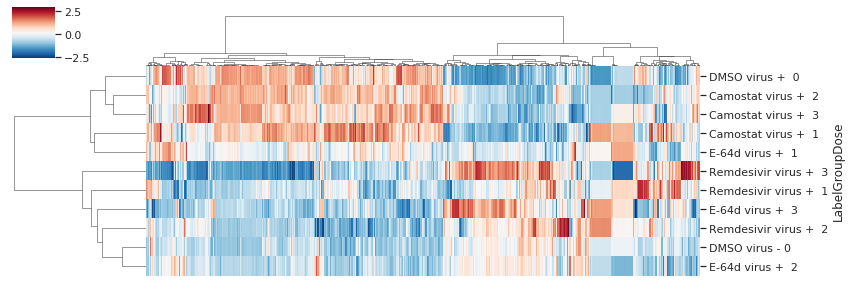

In [9]:
x = Grouped.values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, index = Grouped.index)

sns.set(font_scale=1)
sns_plot = sns.clustermap(x, method='ward', metric='euclidean', z_score=True,
                   standard_scale=None,  cbar_kws=None, figsize=(12, 4), 
                   row_cluster=True, col_cluster=True,
                   cbar_pos=(0.02, 0.8, 0.05, 0.18), 
                   row_linkage=None, col_linkage=None, row_colors=None,
                   col_colors=None, cmap="RdBu_r", xticklabels=False )
sns_plot.savefig('{}/Clustermap.{}'.format(OutputDir, 'pdf'),  dpi=300)

In [10]:
CorrMatrics = x.T.corr()

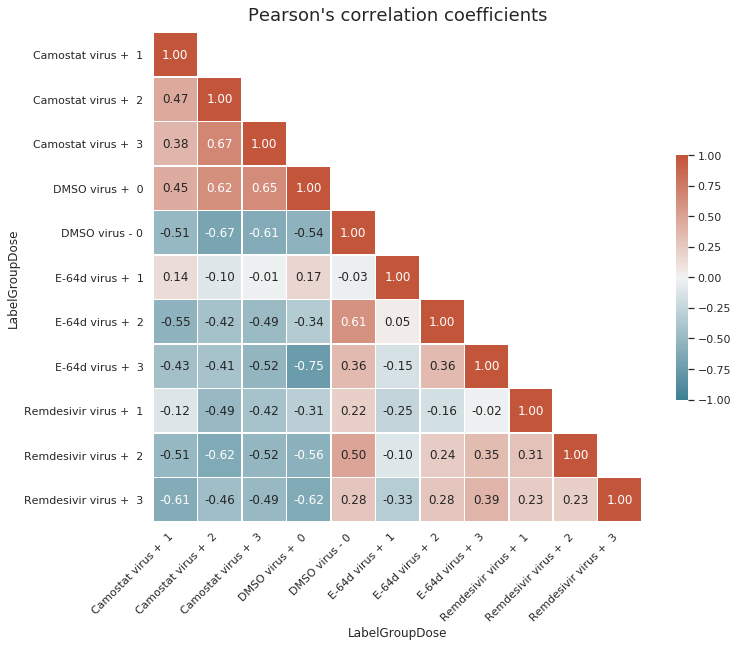

In [11]:
sns.set(font_scale=1)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12,9)) 

mask = np.triu(np.ones_like(CorrMatrics, dtype=np.bool))
for a in range(mask.shape[0]):
    mask[a, a] = False
    
sns.heatmap(CorrMatrics, vmin=-1, vmax=1, mask=mask, linewidths=.5, ax = ax, fmt='.2f',
                 annot=True, 
                 cmap=sns.diverging_palette(220, 20, n=200),
                 cbar_kws={"shrink": 0.5},
             square=True
                )

ax.set_title('Pearson\'s correlation coefficients', fontdict={'fontsize':18}, pad=12)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

fig.savefig('{}/CorrelationMatrix.{}'.format(OutputDir, 'pdf'),  dpi=300)